# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL

url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"
#url="http://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}&q={city}"

    # Log the url, record, and set numbers
   # print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE
        # response = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]# YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"] # YOUR CODE HERE
        city_max_temp =city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE
        city_clouds =  city_weather["clouds"]["all"]# YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"]# YOUR CODE HERE
        city_country =  city_weather["sys"]["country"]# YOUR CODE HERE
        city_date = city_weather["dt"]# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                          })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | remire-montjoly
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | kayangel
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | alice springs
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | szigetvar
Processing Record 14 of Set 1 | rio grande
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | sovetsk
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | ust'-kulom
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | talnakh
Processing Record

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,remire-montjoly,4.9167,-52.2667,23.02,100,20,1.03,GF,1712568787
1,wailua homesteads,22.0669,-159.3780,22.44,84,75,7.20,US,1712568592
2,kayangel,8.0823,134.7173,28.25,77,15,6.12,PW,1712568787
3,kodiak,57.7900,-152.4072,-1.27,86,0,0.00,US,1712568787
4,alice springs,-23.7000,133.8833,24.56,21,99,3.09,AU,1712568754


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,remire-montjoly,4.9167,-52.2667,23.02,100,20,1.03,GF,1712568787
1,wailua homesteads,22.0669,-159.3780,22.44,84,75,7.20,US,1712568592
2,kayangel,8.0823,134.7173,28.25,77,15,6.12,PW,1712568787
3,kodiak,57.7900,-152.4072,-1.27,86,0,0.00,US,1712568787
4,alice springs,-23.7000,133.8833,24.56,21,99,3.09,AU,1712568754


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

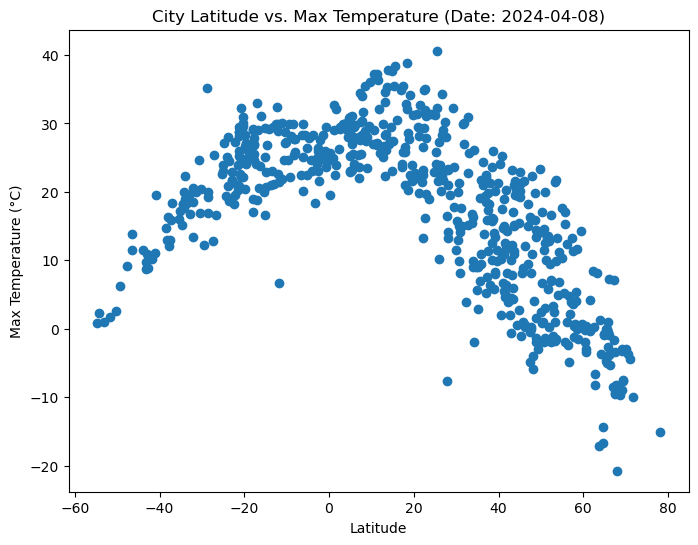

In [43]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date: 2024-04-08)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

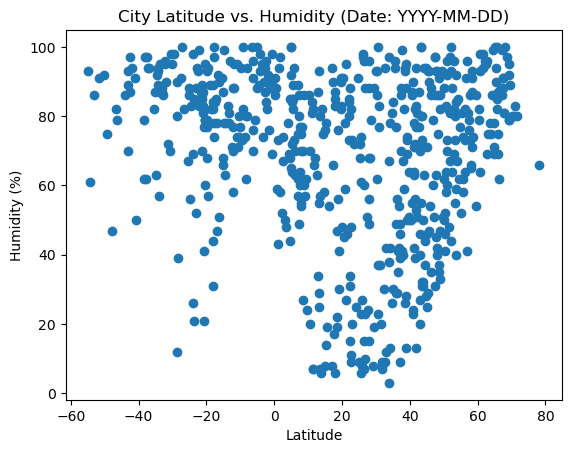

In [37]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date: YYYY-MM-DD)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

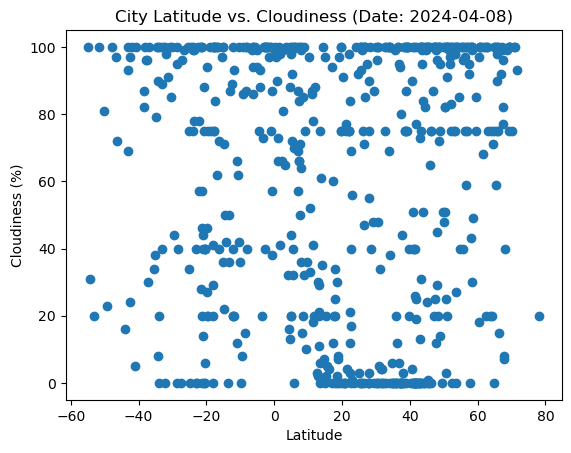

In [36]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (Date: 2024-04-08)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

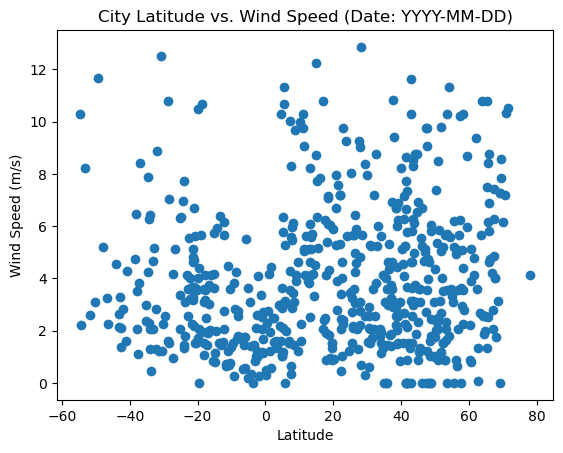

In [35]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (Date: YYYY-MM-DD)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, xlabel, ylabel):

    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression values
    regress_values = x_values * slope + intercept

    # Plot the scatter plot
    plt.scatter(x_values, y_values)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Create equation of line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Annotate the line equation
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs. {ylabel}")

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

def northern_hemisphere_data(df):
   
    northern_hemi_df = df[df["Lat"] >= 0]
    return northern_hemi_df


# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = northern_hemisphere_data(city_data_df)

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,remire-montjoly,4.9167,-52.2667,23.02,100,20,1.03,GF,1712568787
1,wailua homesteads,22.0669,-159.3780,22.44,84,75,7.20,US,1712568592
2,kayangel,8.0823,134.7173,28.25,77,15,6.12,PW,1712568787
3,kodiak,57.7900,-152.4072,-1.27,86,0,0.00,US,1712568787
6,sitka,57.0531,-135.3300,3.94,81,100,5.66,US,1712568678


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
def southern_hemisphere_data(df):

    southern_hemi_df = df[df["Lat"] < 0]
    return southern_hemi_df


southern_hemi_df = southern_hemisphere_data(city_data_df)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,alice springs,-23.7000,133.8833,24.56,21,99,3.09,AU,1712568754
5,geraldton,-28.7667,114.6000,35.23,12,0,10.80,AU,1712568788
8,puerto natales,-51.7236,-72.4875,1.73,91,100,2.59,CL,1712568537
9,port mathurin,-19.6833,63.4167,27.18,79,20,4.39,MU,1712568788
10,adamstown,-25.0660,-130.1015,23.88,86,34,3.37,PN,1712568788


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6912953351087131


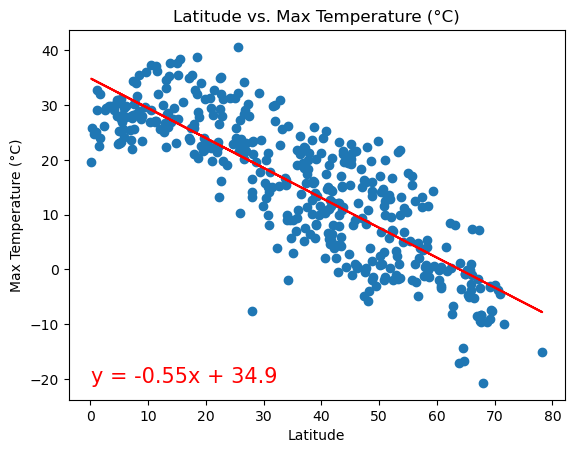

In [22]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],"Latitude", "Max Temperature (°C)")


The r-squared is: 0.5415427960004807


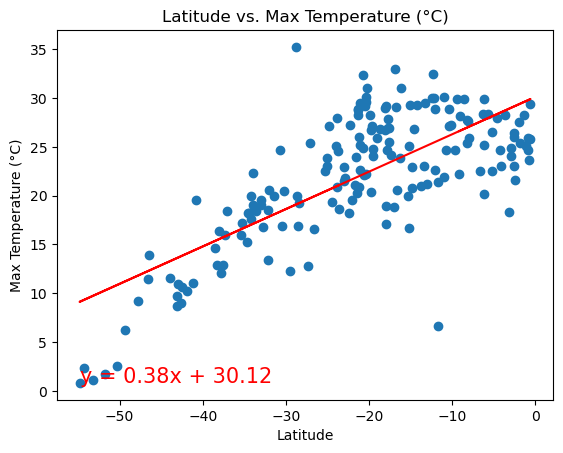

In [23]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04712364887146344


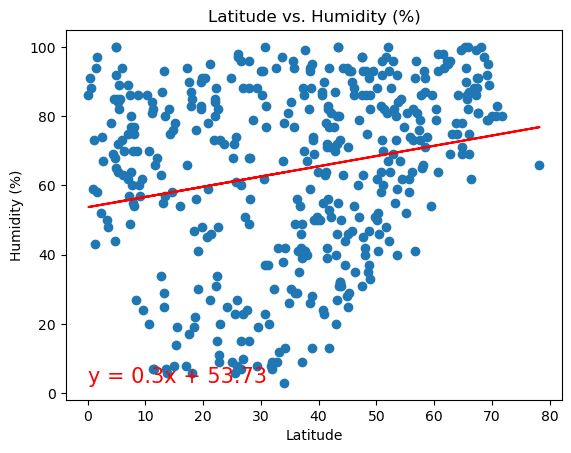

In [24]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)")

The r-squared is: 0.0036233909945779007


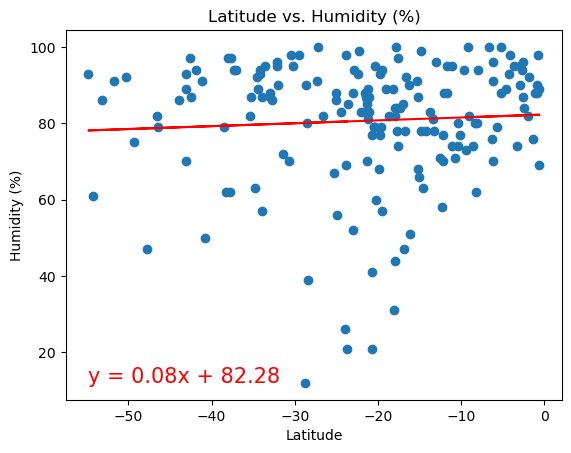

In [25]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0312085749838286


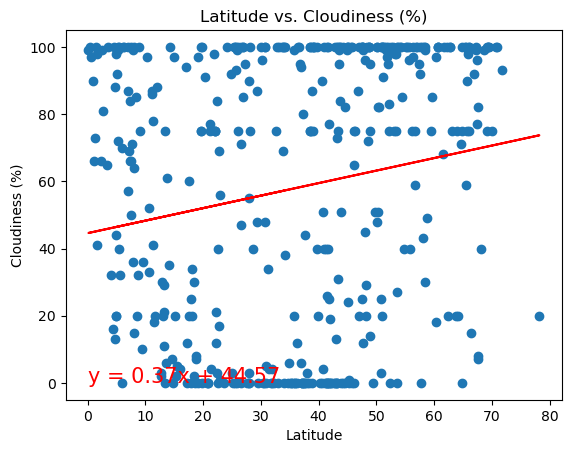

In [26]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)")

The r-squared is: 0.002808710082198627


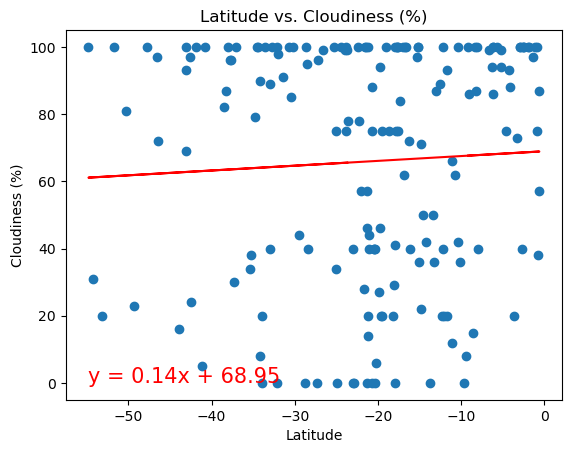

In [27]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0015637048877383958


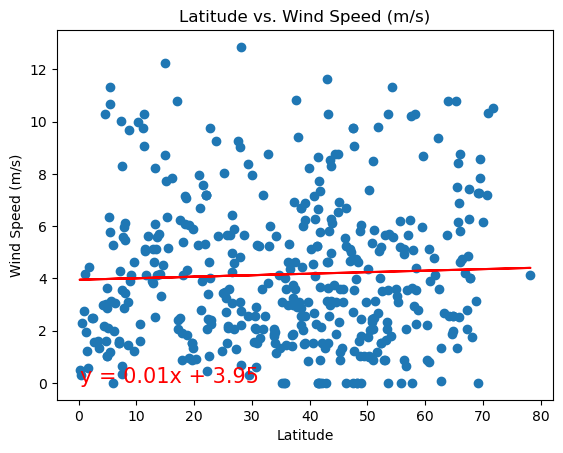

In [28]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)")

The r-squared is: 0.11704779779146994


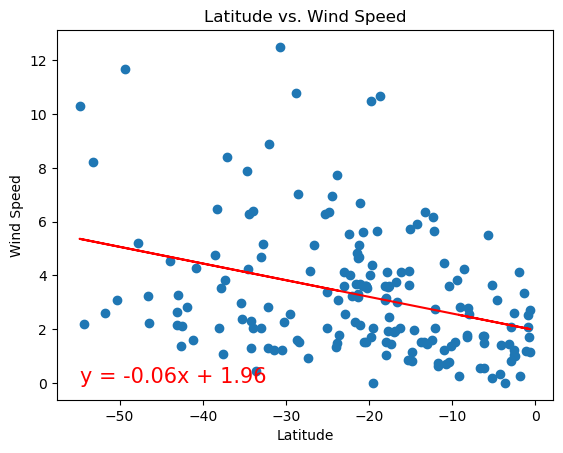

In [30]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE